In [232]:
a = str(dt_object)
a = a+'-4:00'
a

'2018-12-25 10:27:53-4:00'

In [209]:
from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2018-12-25 10:27:53
type(dt_object) = <class 'datetime.datetime'>


In [1]:
from nilmtk.dataset_converters import convert_redd
from nilmtk import DataSet
from nilmtk.utils import print_dict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import models
import torch.nn.functional as F
import torchaudio
import torch
import torch.nn as nn
import torch.optim as optim

D:\anaconda3\envs\NILM\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [3]:
import copy

In [4]:
# Define the function will be used
def genrate_label(device, label_name):
    label = copy.deepcopy(device)
    label[label>0] = 1
    label.columns = [label_name]
    return label

def plot_line_graph(device, start_timestamp, end_timestamp):
    y = device.loc[start_time:end_time]
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.show

In [3]:
# If first time, should convert data into .h5 format
convert_redd(r"E:\NILM\REDD\low_freq\low_freq", r"E:\NILM\REDD\low_freq\redd.h5")

Loading house 1... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 11 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 
Loaded metadata
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


In [5]:
# Read data from disk
redd = DataSet(r"E:\NILM\REDD\low_freq\redd.h5")

# Select top 5 devices from the building 1
elec = redd.buildings[1].elec
top_8 = elec.select_top_k(k=8)

17/18 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])ce=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
18/18 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

In [6]:
# Get the electricity usage of the five appliances that consume the most electricity
fridge = next(top_8[5].load(sample_period=3)).fillna(method='ffill').reset_index().drop(labels=[('index', '')], axis=1)
light_1 = next(top_8[9].load(sample_period=3)).fillna(method='ffill').reset_index().drop(labels=[('index', '')], axis=1)
light_2 = next(top_8[17].load(sample_period=3)).fillna(method='ffill').reset_index().drop(labels=[('index', '')], axis=1)
sockets = next(top_8[8].load(sample_period=3)).fillna(method='ffill').reset_index().drop(labels=[('index', '')], axis=1)
dish_washer = next(top_8[6].load(sample_period=3)).fillna(method='ffill').reset_index().drop(labels=[('index', '')], axis=1)
mains = fridge+light_1+light_2+sockets+dish_washer

# Genrate labels for each device
fridge_label = genrate_label(fridge, 'fridge_label')
light_1_label = genrate_label(light_1, 'light_1_label')
light_2_label = genrate_label(light_2, 'light_2_label')
sockets_label = genrate_label(sockets, 'sockets_label')
dish_washer_label = genrate_label(dish_washer, 'dish_washer_label')
mains_label = pd.concat([fridge_label, light_1_label, light_2_label, sockets_label, dish_washer_label], axis=1)

In [123]:
fridge.index[[1,3]]

Int64Index([1, 3], dtype='int64')

In [7]:
image = torch.tensor(mains.loc[0*100:0*100+99].values)
image = torch.reshape(image, (10,10)).T

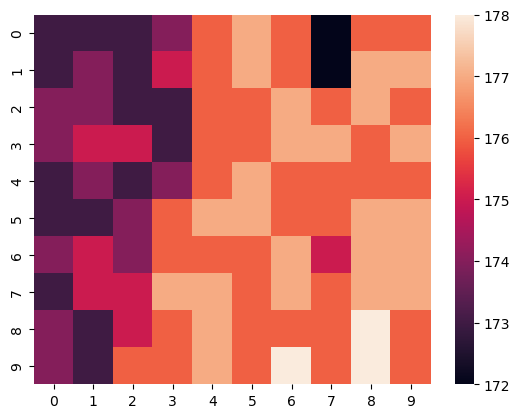

In [8]:
sns.heatmap(image)

In [110]:
image

tensor([[176., 177., 175., 177., 175., 173., 173., 174., 173., 172.],
        [176., 176., 176., 175., 174., 173., 172., 173., 174., 172.],
        [177., 176., 176., 175., 174., 173., 173., 173., 172., 174.],
        [176., 177., 176., 175., 174., 175., 173., 174., 174., 174.],
        [177., 176., 176., 176., 173., 175., 173., 174., 174., 173.],
        [176., 176., 175., 176., 174., 173., 173., 174., 173., 174.],
        [176., 176., 176., 176., 174., 173., 174., 172., 174., 173.],
        [176., 175., 176., 173., 173., 172., 173., 173., 175., 174.],
        [176., 175., 176., 175., 174., 173., 173., 173., 174., 174.],
        [176., 175., 176., 175., 174., 173., 173., 173., 174., 174.]])

In [55]:
# Create a CustomPowerDataset to load data from memory
class CustomPowerDataset(Dataset):
    def __init__(self, power_data, power_label):
        self.power_data = power_data
        self.power_label = power_label
    
    def __len__(self, power_label):
        return len(power_label)
    
    def __getitem__(self, idx):
        image = torch.tensor(self.power_data.loc[idx*100:idx*100+99].value)
        image = torch.reshape(image, (10,10)).T
        
        # Here we return a image with shape (10,10) and a label with shape (5,1)
        return image, label

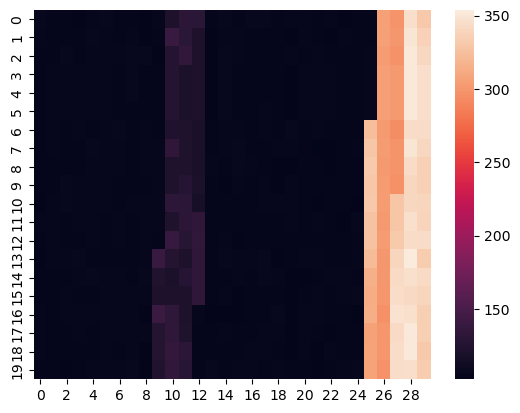

In [248]:
plot_heatmap(mains,'2011-04-19 17:00:00-04:00', '2011-04-19 17:29:59-04:00')

In [212]:
# Genrate labels(sample with two states 0 and 1)
label_fridge = []

physical_quantity,power
type,active
2011-04-18 09:22:12-04:00,6.0
2011-04-18 09:22:15-04:00,6.0
2011-04-18 09:22:18-04:00,6.0
2011-04-18 09:22:21-04:00,6.0
2011-04-18 09:22:24-04:00,6.0
...,...
2011-05-24 15:56:21-04:00,187.0
2011-05-24 15:56:24-04:00,187.0
2011-05-24 15:56:27-04:00,190.0


In [198]:
window_mains = mains.loc['2011-04-21 00:00:00-04:00':'2011-04-21 23:59:59-04:00']

<function matplotlib.pyplot.show(*args, **kw)>

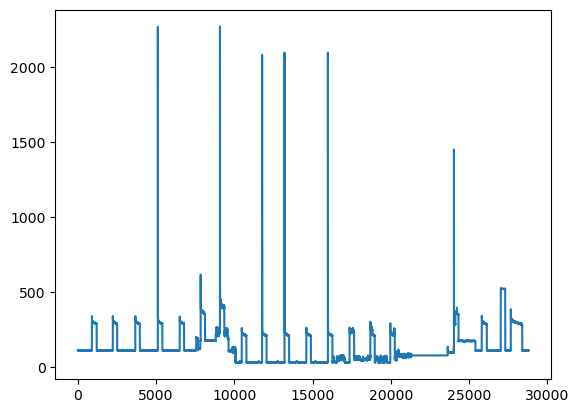

In [206]:
x = np.arange(len(window_mains))
fig, ax = plt.subplots()
ax.plot(x, window_mains)
plt.show

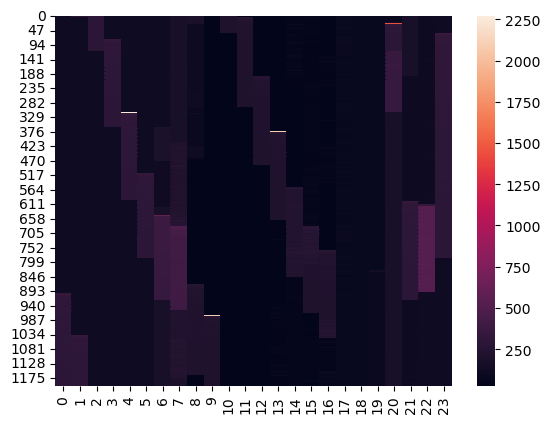

In [193]:
a = window_mains.to_numpy().reshape(24,1200).T
sns.heatmap(a)

In [156]:
window_mains = mains.loc['2011-04-19 00:00:00-04:00':'2011-04-19 23:59:59-04:00']
a = window_mains.to_numpy().reshape(24,1200).T
sns.heatmap(a)

(1200, 24)